# Comparing different clustering algorithms for different Preprocessing techniques

## Importing Libraries (We will be primarily using pycaret)

In [54]:
import pycaret
import pandas as pd

from pycaret.utils import version
version()

'3.3.2'

## Viewing available dataset in ucl Library

In [2]:
from pycaret.datasets import get_data
get_data('index') ## Here we have a total of 56 datasets

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


## Importing Dataset (we will be using "seeds",SN:37 dataset)

In [18]:
dataset=get_data("seeds")

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


### Saving and downloading dataset

In [11]:
dataset.to_csv("seeds.csv")

## Parameter setting for clustering models

In [19]:
from pycaret.clustering import *
s=setup(dataset,session_id=28)

,Description,Value
0,Session id,28
1,Original data shape,"(210, 7)"
2,Transformed data shape,"(210, 7)"
3,Numeric features,7
4,Rows with missing values,1.4%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [21]:
## All available clustering models in pycaret
models()
## We will be using four algorithms: kmeans, hclust, dbscan and birch

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


## Understanding basic operations for pycaret clustering

### Building a clustering model (here using kmeans)

In [28]:
Kmeanmodel=create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3909,275.0454,0.9340,0,0,0


### Assigning clusters using trained model

In [30]:
Kmeanpredictions=assign_model(Kmeanmodel)
Kmeanpredictions

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,15.260000,14.84,0.8710,5.763,3.312,2.221,5.220,Cluster 2
1,14.880000,14.57,0.8811,5.554,3.333,1.018,4.956,Cluster 2
2,14.290000,14.09,0.9050,5.291,3.337,2.699,4.825,Cluster 2
3,13.840000,13.94,0.8955,5.324,3.379,2.259,4.805,Cluster 2
4,16.139999,14.99,0.9034,5.658,3.562,1.355,5.175,Cluster 2
...,...,...,...,...,...,...,...,...
205,12.190000,13.20,0.8783,5.137,2.981,3.631,4.870,Cluster 0
206,11.230000,12.88,0.8511,5.140,2.795,4.325,5.003,Cluster 3
207,13.200000,13.66,0.8883,5.236,3.232,8.315,5.056,Cluster 3
208,11.840000,13.21,0.8521,5.175,2.836,3.598,5.044,Cluster 0


### Evaluating models using graphs

In [35]:
evaluate_model(Kmeanmodel)  ## This function usually limited to notebook

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

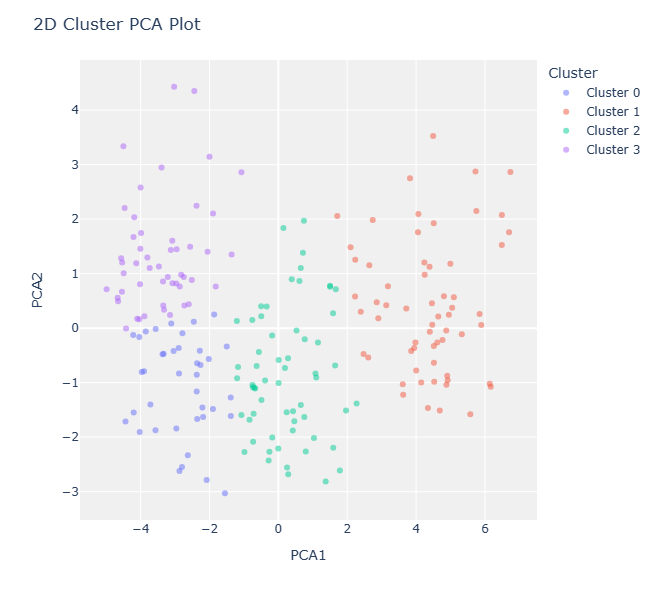

In [33]:
plot_model(Kmeanmodel,plot='cluster')

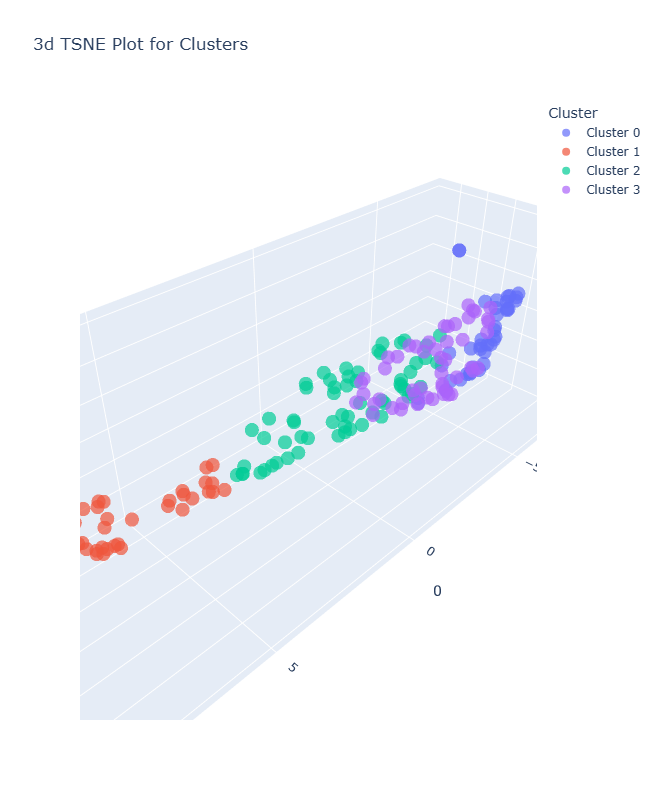

In [34]:
plot_model(Kmeanmodel,plot='tsne')

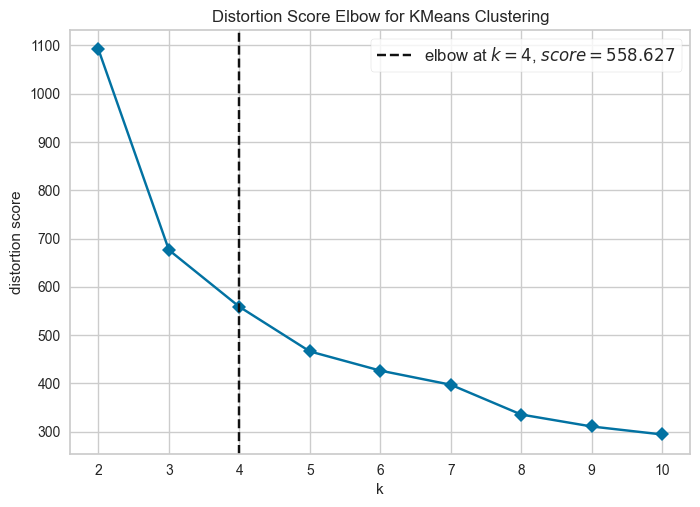

In [36]:
plot_model(Kmeanmodel,plot='elbow')

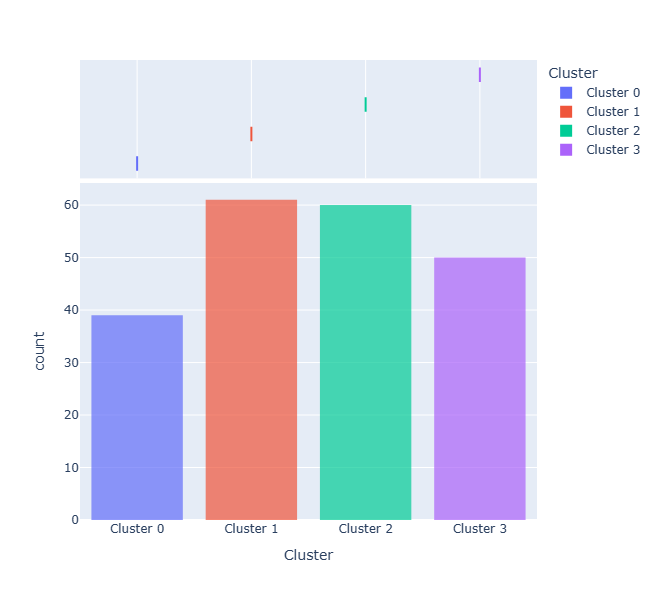

In [37]:
plot_model(Kmeanmodel,plot='distribution')

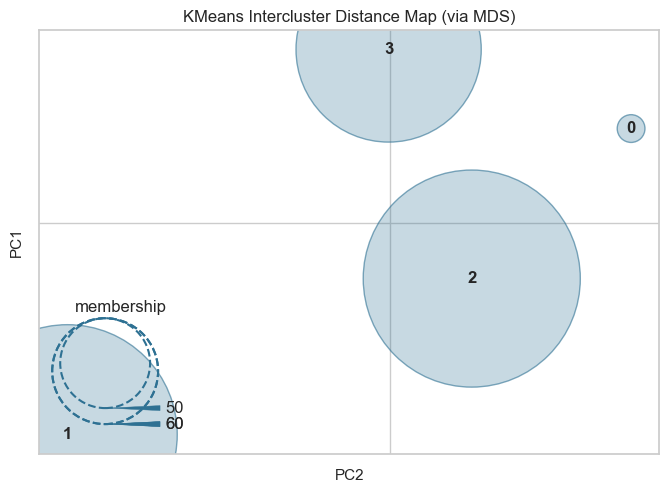

In [38]:
plot_model(Kmeanmodel,plot='distance')

## Comparison

### Using Kmeans clustering algorithm

#### No data Preprocessing

In [39]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)


For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4540,324.4954,0.7987,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3909,275.0454,0.9340,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3788,230.2999,0.9438,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3375,215.0900,1.0268,0,0,0


In [43]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Using Normalization

In [42]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,normalize=True,normalize_method='zscore',verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)

For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3842,155.4342,1.0274,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3011,119.3509,1.1413,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3039,138.0138,1.1575,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2328,125.5648,1.3058,0,0,0


In [44]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Using Transformation

In [45]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,transformation=True,transformation_method='yeo-johnson',verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)

For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5161,492.7559,0.5731,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5219,616.7174,0.5381,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5178,732.8043,0.5552,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5044,783.4492,0.5682,0,0,0


In [47]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Using PCA

In [48]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,pca=True,pca_method='linear',verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)

For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4572,324.3747,0.7981,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3832,271.1957,0.9293,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3701,256.4964,0.9549,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3497,223.8657,0.9696,0,0,0


In [49]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Using Transformation + Normalization

In [50]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,normalize=True,normalize_method='zscore',transformation=True,transformation_method='yeo-johnson',verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)

For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3929,195.8647,0.9932,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3071,152.1490,1.1609,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2563,130.5739,1.3199,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2469,117.2666,1.3072,0,0,0


In [51]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Using Transformation + Normalization + PCA

In [52]:
# can skip starting two lines
from pycaret.datasets import get_data
from pycaret.clustering import *

dataset=get_data('seeds',verbose=False)
setup(dataset,normalize=True,normalize_method='zscore',transformation=True,transformation_method='yeo-johnson',pca=True,pca_method='linear',verbose=False)

print("For Cluster=3")
x=create_model('kmeans',num_clusters=3)

print("For Cluster=4")
x=create_model('kmeans',num_clusters=4)

print("For Cluster=5")
x=create_model('kmeans',num_clusters=5)

print("For Cluster=6")
x=create_model('kmeans',num_clusters=6)

For Cluster=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3960,196.5351,0.9848,0,0,0


For Cluster=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3022,145.0075,1.3367,0,0,0


For Cluster=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2582,125.9156,1.4875,0,0,0


For Cluster=6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2555,112.2360,1.2353,0,0,0


In [53]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
data = {
    ("No Data Processing", "c=3"): [0.4540, 324.4954, 0.7987],
    ("No Data Processing", "c=4"): [0.3909, 275.0454, 0.9340],
    ("No Data Processing", "c=5"): [0.3788, 230.2999, 0.9438],
    ("No Data Processing", "c=6"): [0.3375, 215.0900, 1.0268],

    ("Using Normalization", "c=3"): [0.3842, 155.4342, 1.0274],
    ("Using Normalization", "c=4"): [0.3011, 119.3509, 1.1413],
    ("Using Normalization", "c=5"): [0.3039, 138.0138, 1.1575],
    ("Using Normalization", "c=6"): [0.2328, 125.5648, 1.3058],

    ("Using Transform", "c=3"): [0.5161, 492.7559, 0.5731],
    ("Using Transform", "c=4"): [0.5219, 616.7174, 0.5381],
    ("Using Transform", "c=5"): [0.5178, 732.8043, 0.5552],
    ("Using Transform", "c=6"): [0.5044, 783.4492, 0.5682],

    ("Using PCA", "c=3"): [0.4572,324.3747,0.7981],
    ("Using PCA", "c=4"): [0.3832,271.1957,0.9293],
    ("Using PCA", "c=5"): [0.3701,256.4964,0.9549],
    ("Using PCA", "c=6"): [0.3497,223.8657,0.9696],

    ("Using T+N", "c=3"): [0.3929,195.8647,0.9932],
    ("Using T+N", "c=4"): [0.3071,152.1490,1.1609],
    ("Using T+N", "c=5"): [0.2563,130.5739,1.3199],
    ("Using T+N", "c=6"): [0.2469,117.2666,1.3072],

    ("T+N+PCA", "c=3"): [0.3960,196.5351,0.9848],
    ("T+N+PCA", "c=4"): [0.3022,145.0075,1.3367],
    ("T+N+PCA", "c=5"): [0.2582,125.9156,1.4875],
    ("T+N+PCA", "c=6"): [0.2555,112.2360,1.2353],
}


df1 = pd.DataFrame(data, index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

latex_table = f"""
\\begin{{table}}[h]
    \\centering
    \\caption{{Using K-Means Clustering}}
    {df1.to_latex(index=True, multirow=True, escape=False)}
\\end{{table}}
"""

with open("kmeans_table.tex", "w") as f:
    f.write(latex_table)

df1


\begin{table}[h]
    \centering
    \caption{Using K-Means Clustering}
    \begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{4}{r}{No Data Processing} & \multicolumn{4}{r}{Using Normalization} & \multicolumn{4}{r}{Using Transform} & \multicolumn{4}{r}{Using PCA} & \multicolumn{4}{r}{Using T+N} & \multicolumn{4}{r}{T+N+PCA} \\
 & c=3 & c=4 & c=5 & c=6 & c=3 & c=4 & c=5 & c=6 & c=3 & c=4 & c=5 & c=6 & c=3 & c=4 & c=5 & c=6 & c=3 & c=4 & c=5 & c=6 & c=3 & c=4 & c=5 & c=6 \\
\midrule
Silhouette & 0.454000 & 0.390900 & 0.378800 & 0.337500 & 0.384200 & 0.301100 & 0.303900 & 0.232800 & 0.516100 & 0.521900 & 0.517800 & 0.504400 & 0.457200 & 0.383200 & 0.370100 & 0.349700 & 0.392900 & 0.307100 & 0.256300 & 0.246900 & 0.396000 & 0.302200 & 0.258200 & 0.255500 \\
Calinski-Harabasz & 324.495400 & 275.045400 & 230.299900 & 215.090000 & 155.434200 & 119.350900 & 138.013800 & 125.564800 & 492.755900 & 616.717400 & 732.804300 & 783.449200 & 324.374700 & 271.195700 & 256.496400 & 223

No Data Processing                                \
                                 c=3       c=4       c=5       c=6   
Silhouette                    0.4540    0.3909    0.3788    0.3375   
Calinski-Harabasz           324.4954  275.0454  230.2999  215.0900   
Davies-Bouldin                0.7987    0.9340    0.9438    1.0268   

                  Using Normalization                                \
                                  c=3       c=4       c=5       c=6   
Silhouette                     0.3842    0.3011    0.3039    0.2328   
Calinski-Harabasz            155.4342  119.3509  138.0138  125.5648   
Davies-Bouldin                 1.0274    1.1413    1.1575    1.3058   

                  Using Transform            ... Using PCA            \
                              c=3       c=4  ...       c=5       c=6   
Silhouette                 0.5161    0.5219  ...    0.3701    0.3497   
Calinski-Harabasz        492.7559  616.7174  ...  256.4964  223.8657   
Davies-Bouldin             0.5731    0.5381  ...    0.9549    0.9696   

                  Using T+N                                 T+N+PCA            \
                        c=3       c=4       c=5       c=6       c=3       c=4   
Silhouette           0.3929    0.3071    0.2563    0.2469    0.3960    0.3022   
Calinski-Harabasz  195.8647  152.1490  130.5739  117.2666  196.5351  145.0075   
Davies-Bouldin       0.9932    1.1609    1.3199    1.3072    0.9848    1.3367   

                                       
                        c=5       c=6  
Silhouette           0.2582    0.2555  
Calinski-Harabasz  125.9156  112.2360  
Davies-Bouldin       1.4875    1.2353  

[3 rows x 24 columns]